EXERCISE 1

The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

In [1]:
import scipy
print(scipy.__version__)

1.7.3


In [3]:
import pandas as pd
import numpy as np
from scipy import stats

In [7]:
mu = 13.20
s = 2.50
x = 12.20

H0: μ = 13.20, Ha: μ < 13.20

In [18]:
z_score = (mu - x) / (s/np.sqrt(40))
z_score

2.5298221281347035

In [21]:
upper_area = 1.0-stats.norm.cdf(z_score)
upper_area

0.005706018193000872

H0 is rejected, So we can say that there is evidence that the company is paying substandard wages.

EXERCISE 2

Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [159]:
df = pd.read_excel("soil.xlsx")
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


#H0: mu1 = mu2
#H1: mu1 != mu2

In [52]:
leveneTest = stats.levene(df.dropna()['Soil1'], df['Soil2'])
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [ ]:
we can say that h0 rejected and two groups have different variance

In [35]:
df.Soil1.isna().sum()

5

In [36]:
df.Soil2.isna().sum()

0

In [32]:
df.Soil2

(35,)

In [28]:
df.Soil1.mean()

1.6918

In [29]:
df.Soil2.mean()

1.4171142857142855

In [160]:
len(df.dropna()['Soil1'])

30

In [166]:
indTest = stats.ttest_ind(df.dropna()['Soil1'], df['Soil2'],equal_var=True)
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [ ]:
alpha=0.01
if p_val<alpha :
  print("reject the null")
else:
  print("fail to reject the null")

Exercise 3

The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [103]:
df1 = pd.read_excel("pisa.xlsx")
df1.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [162]:
df1.groupby('Continent_Code').describe()

internet_users_per_100                                   \
                                count       mean        std        min   
Continent_Code                                                           
AF                                2.0  43.359918   7.297226  38.200000   
AS                               17.0  68.455613  21.086060  21.976068   
EU                               37.0  77.274888  12.425773  53.744979   
OC                                2.0  86.391704   2.589686  84.560519   
SA                                7.0  60.180494   9.772455  40.900000   

                                                            Math              \
                      25%        50%        75%        max count        mean   
Continent_Code                                                                 
AF              40.779959  43.359918  45.939877  48.519836   2.0  363.212100   
AS              50.300000  74.000000  84.948353  92.884826  17.0  466.216647   
EU              68.632900  76.184000  87.479056  98.200000  37.0  477.981449   
OC              85.476112  86.391704  87.307296  88.222889   2.0  494.559750   
SA              57.116462  64.289000  66.321532  69.198471   7.0  402.887700   

                ...     Reading           Science                         \
                ...         75%       max   count        mean        std   
Continent_Code  ...                                                        
AF              ...  358.256450  361.0555     2.0  381.074250   7.536556   
AS              ...  508.690500  535.1002    17.0  467.945847  56.671371   
EU              ...  499.814600  526.4247    37.0  478.299381  34.450616   
OC              ...  507.678175  509.2707     2.0  511.648700   2.340241   
SA              ...  431.922700  458.5709     7.0  421.747186  18.470319   

                                                                       
                     min         25%        50%         75%       max  
Continent_Code                                                         
AF              375.7451  378.409675  381.07425  383.738825  386.4034  
AS              386.4854  417.611200  456.48360  523.277400  555.5747  
EU              383.6824  460.774900  490.22500  501.936900  534.1937  
OC              509.9939  510.821300  511.64870  512.476100  513.3035  
SA              396.6836  408.205450  424.59050  433.794600  446.9561  

[5 rows x 32 columns]

In [151]:
df1.groupby('Continent_Code').mean()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.212100,355.457400,381.074250
AS,68.455613,466.216647,454.059682,467.945847
EU,77.274888,477.981449,476.164608,478.299381
OC,86.391704,494.559750,506.085650,511.648700
SA,60.180494,402.887700,425.359229,421.747186


In [152]:
df1.groupby('Continent_Code').median()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.21210,355.45740,381.07425
AS,74.000000,459.81600,433.54230,456.48360
EU,76.184000,489.72870,487.25010,490.22500
OC,86.391704,494.55975,506.08565,511.64870
SA,64.289000,409.03330,425.30310,424.59050


In [155]:
df1.groupby('Continent_Code').agg(
    lambda x: pd.Series.mode(x)[0])

,Country Code,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,,
AF,DZA,38.200000,359.6062,349.8593,375.7451
AS,ARE,21.976068,380.2590,346.5490,386.4854
EU,ALB,53.744979,371.3114,351.7415,383.6824
OC,AUS,84.560519,493.8962,502.9006,509.9939
SA,ARG,40.900000,377.0695,397.5414,396.6836


In [156]:
df1.groupby('Continent_Code').std()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,7.297226,5.099513,7.916909,7.536556
AS,21.086060,64.356490,57.048962,56.671371
EU,12.425773,35.150403,37.720545,34.450616
OC,2.589686,0.938401,4.504341,2.340241
SA,9.772455,18.128894,19.709688,18.470319


In [157]:
df1.groupby('Continent_Code').var()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,53.249507,26.005030,62.677447,56.799679
AS,444.621918,4141.757822,3254.584049,3211.644321
EU,154.399841,1235.550805,1422.839540,1186.844969
OC,6.706475,0.880597,20.289087,5.476726
SA,95.500869,328.656783,388.471816,341.152678


In [158]:
df1.groupby('Continent_Code').skew()

/Users/nilgun/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:937: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(x, *args, **kwargs)


,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,NaN,NaN,NaN,NaN
AS,-0.775229,0.144656,-0.099169,0.135810
EU,-0.049351,-1.245494,-1.325443,-0.881399
OC,NaN,NaN,NaN,NaN
SA,-1.469258,-0.372256,0.325499,-0.207071


The skewness values can be interpreted in the following manner:

Highly skewed distribution: If the skewness value is less than −1 or greater than +1.

Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.

Approximately symmetric distribution: If the skewness value is between −½ and +½.

In [82]:
df1.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [83]:
import matplotlib.pyplot as plt

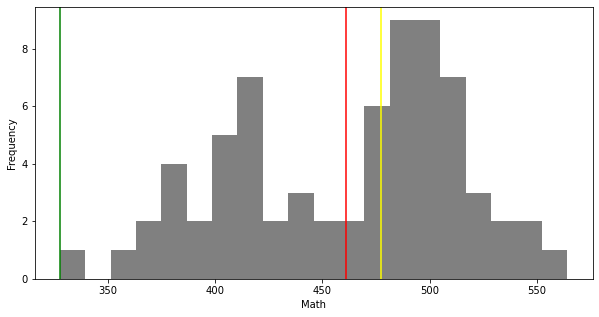

In [92]:
mean=df1.Math.mean()
median=df1.Math.median()
mode=df1.Math.mode()
plt.figure(figsize=(10,5))
plt.hist(df1.Math,bins=20,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Math')
plt.ylabel('Frequency')
plt.show()

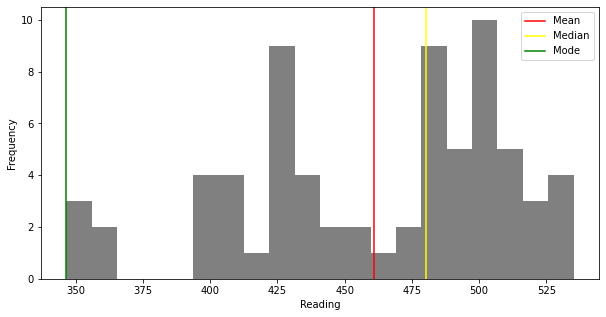

In [93]:
mean=df1.Reading.mean()
median=df1.Reading.median()
mode=df1.Reading.mode()
plt.figure(figsize=(10,5))
plt.hist(df1.Reading,bins=20,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Reading')
plt.ylabel('Frequency')
plt.legend()
plt.show()

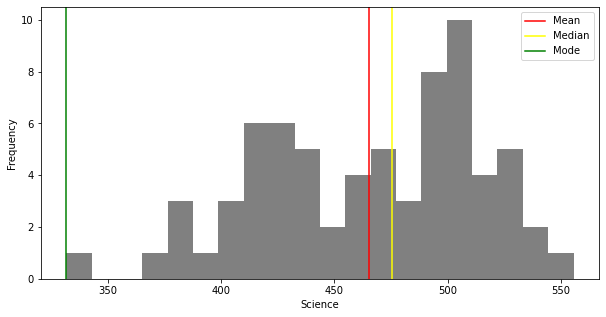

In [94]:
mean=df1.Science.mean()
median=df1.Science.median()
mode=df1.Science.mode()
plt.figure(figsize=(10,5))
plt.hist(df1.Science,bins=20,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Science')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [96]:
EU = df1[df1['Continent_Code'] == "EU"]['Math']
EU

0     413.1570
4     496.7423
5     506.9844
6     441.1899
9     521.2506
14    437.1443
15    492.3254
16    505.9713
17    511.0876
20    485.8432
21    519.5291
22    511.0769
23    492.9204
24    492.4785
26    453.6299
28    464.0401
29    476.8309
31    503.7220
32    488.0332
34    489.7287
40    478.3834
41    485.7706
42    482.3051
44    419.6635
46    371.3114
47    478.6448
48    417.9341
50    512.2528
51    501.7298
54    504.4693
55    491.6270
57    443.9543
58    494.0600
60    475.2301
61    509.9196
62    493.9181
66    420.4540
Name: Math, dtype: float64

In [97]:
AS = df1[df1['Continent_Code'] == "AS"]['Math']
AS

1     427.4827
11    531.2961
25    403.8332
27    547.9310
30    386.1096
33    469.6695
35    380.2590
36    532.4399
37    459.8160
38    524.1062
39    396.2497
43    543.8078
49    446.1098
56    402.4007
59    564.1897
63    415.4638
69    494.5183
Name: Math, dtype: float64

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt 
% matplotlib inline

In [145]:
df1[(df1['Continent_Code'] == "AS") | (df1['Continent_Code'] == "EU")][['Math','Continent_Code']]

,Math,Continent_Code
0,413.1570,EU
1,427.4827,AS
4,496.7423,EU
5,506.9844,EU
6,441.1899,EU
9,521.2506,EU
11,531.2961,AS
14,437.1443,EU
15,492.3254,EU
16,505.9713,EU


<AxesSubplot:xlabel='Continent_Code', ylabel='Math'>

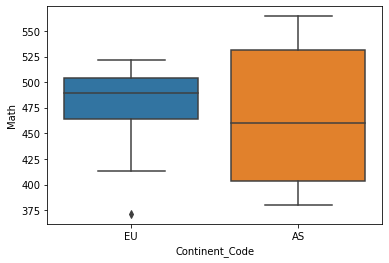

In [147]:
sns.boxplot(y  = 'Math',x='Continent_Code', data = df1[(df1['Continent_Code'] == "AS") | (df1['Continent_Code'] == "EU")][['Math','Continent_Code']])

In [ ]:
#H0: mu1 = mu2
#H1: mu1 != mu2

In [98]:
indTest = stats.ttest_ind(EU, AS,equal_var=True)
indTest

Ttest_indResult(statistic=0.8700553179679787, pvalue=0.38826888111307556)

In [ ]:
alpha=0.05
if p_val<alpha :
  print("reject the null")
else:
  print("fail to reject the null")

EXERCISE 4

EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

In [109]:
df1 = pd.read_excel("student.xlsx")
df1.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783.0,1995-03-22,NaT,NaT,NaN,NaN,0.0,0.0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278.0,1995-01-01,NaT,NaT,NaN,Philosophy,0.0,0.0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389.0,1994-12-31,NaT,NaT,NaN,NaN,0.0,0.0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820.0,1994-12-01,NaT,NaT,NaN,business administration,1.0,0.0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559.0,1994-11-10,NaT,NaT,NaN,NaN,1.0,1.0,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [112]:
df1.isnull().sum()

ids               0
bday              8
enrolldate       29
expgradate       29
Rank             29
Major           159
Gender            9
Athlete           0
Height           27
Weight           59
Smoking          24
Sprint           61
MileMinDur       43
English          26
Reading          10
Math             13
Writing          31
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64

In [117]:
df1.describe()

,ids,Rank,Gender,Athlete,Height,Weight,Smoking,Sprint,English,Reading,Math,Writing,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
count,435.000000,406.000000,426.000000,435.000000,408.000000,376.000000,411.000000,374.000000,409.000000,425.000000,422.000000,404.000000,414.000000,247.000000,247.000000,403.000000,393.000000
mean,35279.022989,2.199507,0.521127,0.422989,68.031765,181.031569,0.430657,6.581933,82.787555,82.070800,65.468009,79.521683,0.410628,2.781377,27.000000,5.461538,7.208651
std,8637.733605,1.098641,0.500141,0.494602,5.325655,42.749680,0.766324,1.227069,6.839803,7.661778,8.375930,5.511410,0.492543,0.698996,10.072905,2.421994,4.356233
min,20183.000000,1.000000,0.000000,0.000000,55.000000,101.710000,0.000000,4.503000,59.830000,55.110000,35.320000,64.060000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,28001.000000,1.000000,0.000000,0.000000,64.827500,153.860000,0.000000,5.587500,78.330000,77.190000,60.202500,75.750000,0.000000,3.000000,21.000000,4.000000,4.000000
50%,35350.000000,2.000000,1.000000,0.000000,67.570000,172.960000,0.000000,6.569000,83.150000,81.940000,65.445000,79.035000,0.000000,3.000000,27.000000,5.000000,6.000000
75%,42655.500000,3.000000,1.000000,1.000000,71.575000,204.307500,1.000000,7.458000,87.170000,87.080000,70.567500,83.687500,1.000000,3.000000,32.000000,7.000000,10.000000
max,49947.000000,4.000000,1.000000,1.000000,84.410000,350.070000,2.000000,9.597000,101.950000,103.620000,93.780000,93.010000,1.000000,4.000000,64.000000,13.000000,23.000000


In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ids           435 non-null    float64       
 1   bday          427 non-null    datetime64[ns]
 2   enrolldate    406 non-null    datetime64[ns]
 3   expgradate    406 non-null    datetime64[ns]
 4   Rank          406 non-null    float64       
 5   Major         276 non-null    object        
 6   Gender        426 non-null    float64       
 7   Athlete       435 non-null    float64       
 8   Height        408 non-null    float64       
 9   Weight        376 non-null    float64       
 10  Smoking       411 non-null    float64       
 11  Sprint        374 non-null    float64       
 12  MileMinDur    392 non-null    object        
 13  English       409 non-null    float64       
 14  Reading       425 non-null    float64       
 15  Math          422 non-null    float64   

In [ ]:
# H0: avg = 0 
# H1: avg != 0  (math_avg - english_avg)

In [127]:
pairedtest = stats.ttest_rel(df1.Math, df1.English, nan_policy='omit',alternative='two-sided')
pairedtest


Ttest_relResult(statistic=-36.31256898171986, pvalue=3.071098719220689e-128)

There was a significant average difference between English and Math scores (value = 3.071098719220689e-128, p < 0.001).